## Loading and plotting of real _C. elegans_ datasets.
---
*Last updated: 17 June 2024*

We have obtained "whole brain" calcium imaging data from a few open source datasets. 
# TODO: Add Dag2023 and Nejatbakhsh2020
 ______________________________________________________________________________________________________________________________________________________________________
|Paper link              |Database link                |Data files                 |Num. worms |Mean num. neurons (labeled, recorded) |Num. labeled neurons (min, max) |
|------------------------|-----------------------------|---------------------------|-----------|--------------------------------------|--------------------------------|
|(unpublished data)      |chemosensory-data.worm.world |`2022*_herm_*.zip`         |      22   |             (187, 187)               |          (185, 189)            |
|tinyurl.com/ALin2023    |tinyurl.com/dropboxLin2023   |`run*_prfrd_data*.mat`     |     577   |               (8, 8)                 |             (1, 22)            |
|tinyurl.com/Leifer2023  |tinyurl.com/driveLeifer2023  |`exported_data.tar.gz`     |     108   |              (64, 68)                |            (19, 98)           |
|tinyurl.com/Flavell2023 |wormwideweb.org              |`YYYY-MM-DD-*.json/h5`     |      42   |              (88, 136)               |            (64, 115)           |
|tinyurl.com/ULin2023    |tinyurl.com/githubLin2023    |`data/swf702_with_id/*.h5` |       7   |             (100, 143)               |            (87, 110)           |
|tinyurl.com/Uzel2022    |osf.io/3vkxn/                |`Uzel_WT.mat`              |       6   |              (50, 138)               |            (46, 58)            |
|tinyurl.com/Yemini2021  |zenodo.org/records/3906530   |`*_Activity_OH*.mat`       |      49   |             (110, 125)               |            (33, 179)           |
|tinyurl.com/Kaplan2020a |osf.io/9nfhz/                |`Neuron2019_Data_*.mat`    |      19   |              (36, 114)               |            (23, 51)            |
|tinyurl.com/Skora2018   |osf.io/za3gt/                |`WT_*.mat`                 |      12   |              (46, 129)               |            (39, 55)            |
|tinyurl.com/Nichols2017 |osf.io/kbf38/                |`*let.mat`                 |      44   |              (34, 108)               |            (23, 43)            |
|tinyurl.com/Kato2015    |osf.io/2395t/                |`WT_*Stim.mat`             |      12   |              (42, 127)               |            (31, 51)            |
|________________________|_____________________________|___________________________|___________|______________________________________|________________________________|

### What's the distinction between "whole-brain" and "whole-nervous system" recordings? 

The nervous system of the _C. elegans_ hermaphrodite is composed of 300 neurons that are organized in several 
ganglia in the head and tail and into a spinal cord-like ventral nerve cord [1]. The majority of the neurons 
is located in the head, where they are organised in a number of ganglia surrounding the pharynx, forming the 
brain of the animal [2].

References:
- [1] http://www.wormbook.org/chapters/www_specnervsys.2/neurogenesis.html<br>
- [2] https://www.sfu.ca/biology/faculty/hutter/hutterlab/research/Ce_nervous_system.html<br>

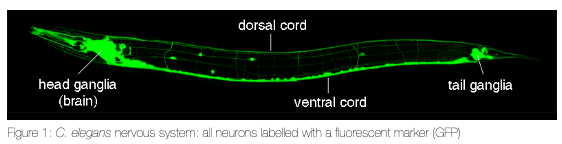

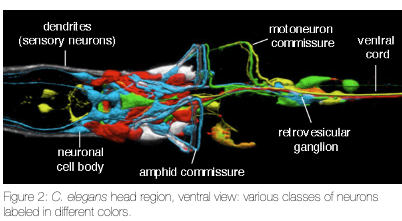

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import init_random_seeds
from visualize._utils import plot_worm_data
from data._utils import pick_worm, load_dataset

# Initialize the random seeds
init_random_seeds(42)

Loading from /net/vast-storage/scratch/vast/yanglab/qsimeon/worm-graph/data/raw/neuron_master_sheet.csv.

CUDA device found.
	 GPU: Tesla T4


12 ['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11']

Avg num. neurons ID'd/recorded : 42/127
Range num. ID'd neurons : (31, 51)
Range len. calcium data : (2161, 3244)


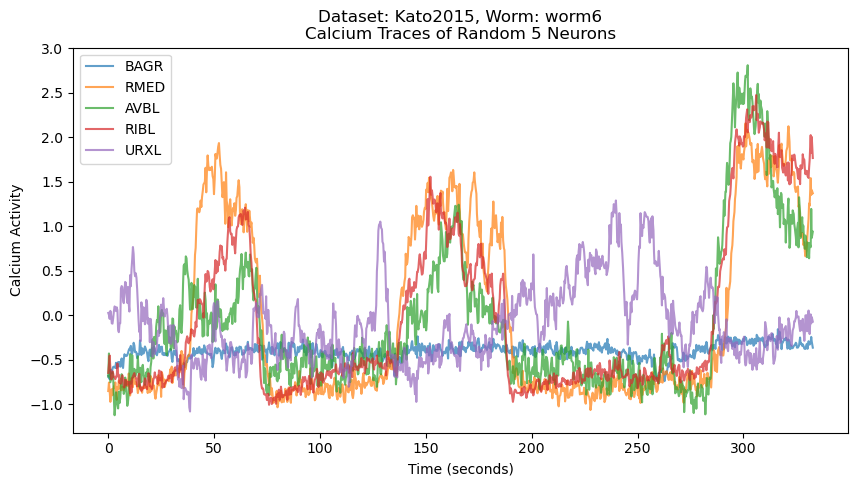

In [2]:
# @title Kato et al., Cell 2015, _Global Brain Dynamics Embed the Motor Command Sequence of Caenorhabditis elegans_
# @markdown Source: https://osf.io/2395t/

# load the dataset
dataset_name = "Kato2015"
Kato2015 = load_dataset(dataset_name)
print(len(Kato2015), list(Kato2015.keys()), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Kato2015.keys()):
    single_worm_dataset = pick_worm(Kato2015, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Kato2015)
    named_avg += labeled_neurons / len(Kato2015)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Kato2015.keys()))
single_worm_dataset = pick_worm(Kato2015, worm)

# plot the calcium activity for a few neurons
plot_worm_data(single_worm_dataset, smooth=False)


# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Kato2015)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Kato2015, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

44 ['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43']

Avg num. neurons ID'd/recorded : 34/108
Range num. ID'd neurons : (23, 43)
Range len. calcium data : (3242, 3244)
{9: 'AFDR', 12: 'AIBL', 13: 'AIBR', 22: 'ALA', 27: 'AQR', 49: 'ASKL', 50: 'ASKR', 51: 'AUAL', 52: 'AUAR', 53: 'AVAL', 54: 'AVAR', 55: 'AVBL', 59: 'AVEL', 61: 'AVFL', 76: 'AWCL', 78: 'BAGL', 79: 'BAGR', 130: 'IL2DR', 153: 'OLQVL', 191: 'RID', 192: 'RIFL', 197: 'RIML', 202: 'RIS', 203: 'RIVL', 204: 'RIVR', 211: 'RMED', 214: 'RMEV', 217: 'RMGL', 226: 'SABVL', 227: 'SABVR', 234: 'SIBDL', 235: 'SIBDR', 237: 'SIBVR', 240: 'SMBVL', 253: 'URXR', 254: 'URY

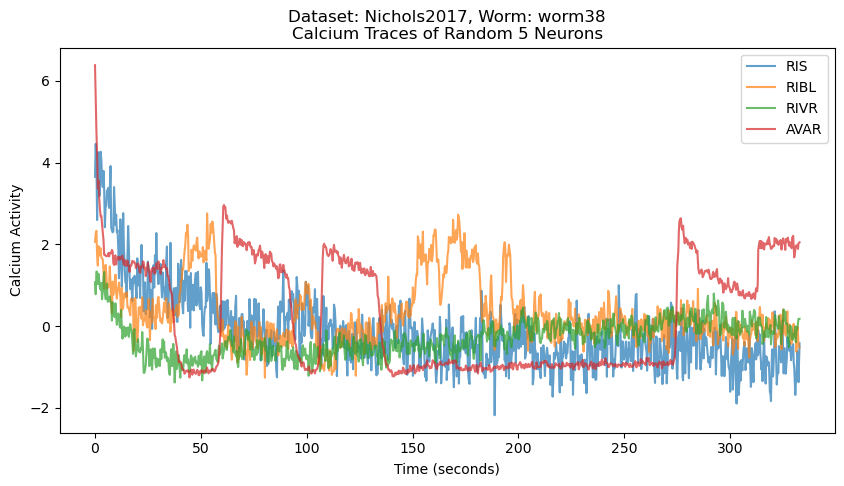

In [3]:
# @title Nichols et al., Science 2017, _A global brain state underlies C. elegans sleep behavior_
# @markdown Source: https://osf.io/kbf38/

# load the dataset
dataset_name = "Nichols2017"
Nichols2017 = load_dataset(dataset_name)
print(len(Nichols2017), list(Nichols2017.keys()), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Nichols2017.keys()):
    single_worm_dataset = pick_worm(Nichols2017, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Nichols2017)
    named_avg += labeled_neurons / len(Nichols2017)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Nichols2017.keys()))
single_worm_dataset = pick_worm(Nichols2017, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Nichols2017)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Nichols2017, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

AssertionError: The file /home/ubuntu/worm-graph/data/processed/neural/Skora2018.pickle does not exist. Please preprocess the data first.

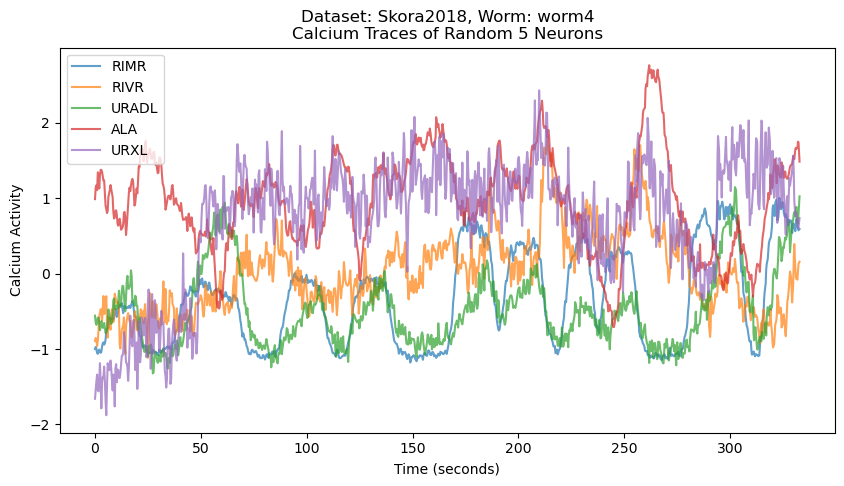

In [4]:
# @title Skora et al., Cell Reports 2018, _Energy Scarcity Promotes a Brain-wide Sleep State Modulated by Insulin Signaling in C. elegans_
# @markdown Source: https://osf.io/za3gt/

# load the dataset
dataset_name = "Skora2018"
Skora2018 = load_dataset(dataset_name)
print(len(Skora2018), Skora2018.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Skora2018.keys()):
    single_worm_dataset = pick_worm(Skora2018, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Skora2018)
    named_avg += labeled_neurons / len(Skora2018)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Skora2018.keys()))
single_worm_dataset = pick_worm(Skora2018, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Skora2018)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Skora2018, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()

# ### DEBUG ###

19 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18'])

Avg num. neurons ID'd/recorded : 36/114
Range num. ID'd neurons : (23, 51)
Range len. calcium data : (5405, 5406)


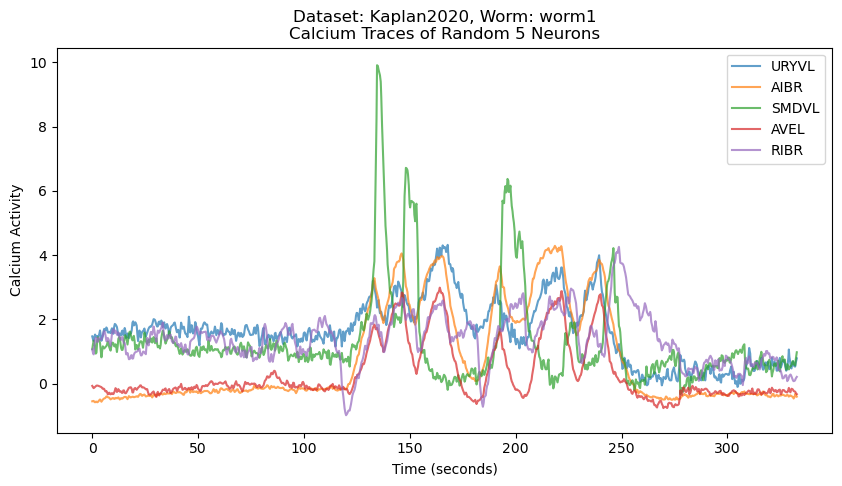

In [5]:
# @title Kaplan et al., Neuron 2020, _Nested Neuronal Dynamics Orchestrate a Behavioral Hierarchy across Timescales_
# @markdown Source: https://osf.io/9nfhz/

# load the dataset
dataset_name = "Kaplan2020"
Kaplan2020 = load_dataset(dataset_name)
print(len(Kaplan2020), Kaplan2020.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Kaplan2020.keys()):
    single_worm_dataset = pick_worm(Kaplan2020, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Kaplan2020)
    named_avg += labeled_neurons / len(Kaplan2020)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Kaplan2020.keys()))
single_worm_dataset = pick_worm(Kaplan2020, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Kaplan2020)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Kaplan2020, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

49 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48'])

Avg num. neurons ID'd/recorded : 110/125
Range num. ID'd neurons : (33, 179)
Range len. calcium data : (694, 717)


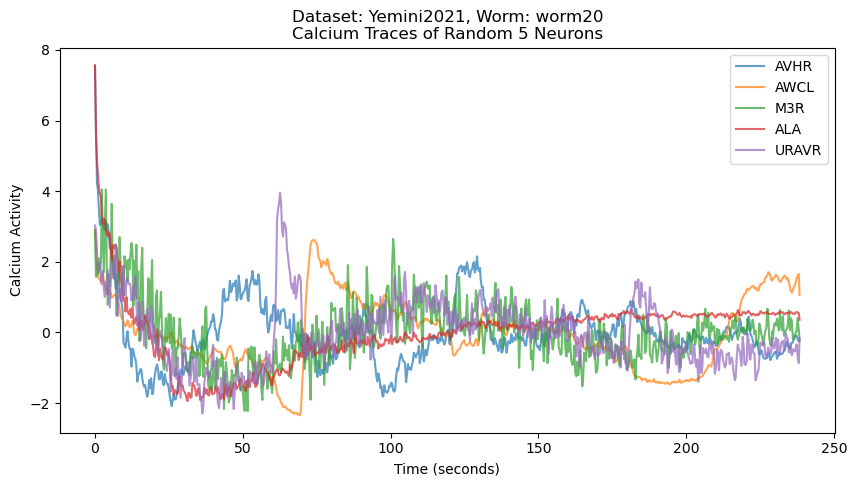

In [6]:
# @title Yemini et al., Cell CurrBio 2022, _NeuroPAL: A Multicolor Atlas for Whole-Brain Neuronal Identification in C. elegans_
# @markdown Source: https://zenodo.org/records/3906530

# load the dataset
dataset_name = "Yemini2021"
Yemini2021 = load_dataset(dataset_name)
print(len(Yemini2021), Yemini2021.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Yemini2021.keys()):
    single_worm_dataset = pick_worm(Yemini2021, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Yemini2021)
    named_avg += labeled_neurons / len(Yemini2021)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Yemini2021.keys()))
single_worm_dataset = pick_worm(Yemini2021, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Yemini2021)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Yemini2021, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

6 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5'])

Avg num. neuron ID'd/recorded : 50/138
Range num. ID'd neurons : (46, 58)
Range len. calcium data : (3242, 3242)
Avg num. ID'd : 50/138


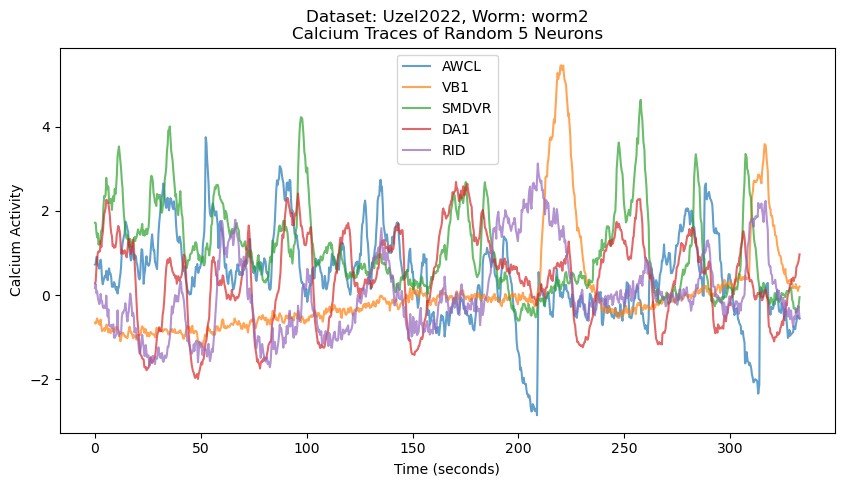

In [7]:
# @title Uzel et al., Cell CurrBio 2022, _A set of hub neurons and non-local connectivity features support global brain dynamics in C. elegans_
# @markdown Source: https://osf.io/3vkxn/

# load the dataset
dataset_name = "Uzel2022"
Uzel2022 = load_dataset(dataset_name)
print(len(Uzel2022), Uzel2022.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Uzel2022.keys()):
    single_worm_dataset = pick_worm(Uzel2022, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Uzel2022)
    named_avg += labeled_neurons / len(Uzel2022)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neuron ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")
print(f"Avg num. ID'd : {int(named_avg)}/{int(total_avg)}")

# get data for one worm
worm = np.random.choice(list(Uzel2022.keys()))
single_worm_dataset = pick_worm(Uzel2022, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Uzel2022)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Uzel2022, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

7 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6'])

Avg num. neurons ID'd/recorded : 100/141
Range num. ID'd neurons : (86, 110)
Range len. calcium data : (1443, 1445)


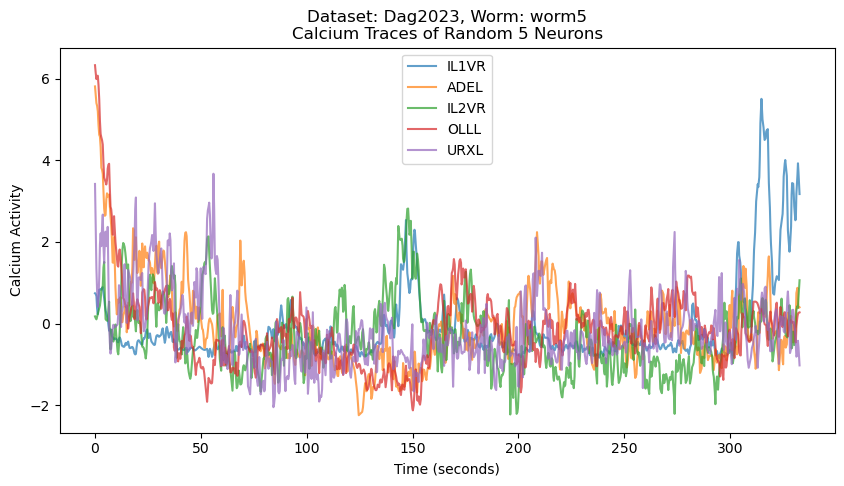

In [8]:
# @title Dag et al., Cell 2023. “_Dissecting the Functional Organization of the C. Elegans Serotonergic System at Whole-Brain Scale_
# @markdown Source: https://github.com/flavell-lab/NSM_5HTR_analysis/tree/main/data/swf702_with_id

# load the dataset
dataset_name = "Lin2023"
Lin2023 = load_dataset(dataset_name)
print(len(Lin2023), Lin2023.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Lin2023.keys()):
    single_worm_dataset = pick_worm(Lin2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Lin2023)
    named_avg += labeled_neurons / len(Lin2023)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Lin2023.keys()))
single_worm_dataset = pick_worm(Lin2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Lin2023)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Lin2023, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     if named_mask.sum() == 0:  # some worms in Lin2023 have no labeled neurons
#         continue

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

40 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41'])

4
dict_values(['ADAL', 'ADEL', 'AIAL', 'AIBL', 'AIBR', 'AIML', 'AINL', 'AIYL', 'AIZL', 'ASEL', 'ASGL', 'AUAL', 'AVAL', 'AVAR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVJL', 'AVJR', 'AVKL', 'AVL', 'AWAR', 'AWBL', 'AWCL', 'BAGL', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'I1L', 'I3', 'IL1DL', 'IL1DR', 'IL1VL', 'IL1VR', 'IL2DL', 'IL2DR', 'IL2L', 'IL2VL', 'IL2VR', 'M3L', 'M3R', 'M4', 'MCR', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RICL', 'RID', 'RIH', 'RIML', 'RIVL', 'RMDDL', 'RMDDR', 'RMDL', 'RMDR', 'RMDVL', 'RMDVR', 'RMEL', 'RMER', 'RMGL', 'SMBDL', 'SMDDL', 'SMDDR', 'SMDVL', 

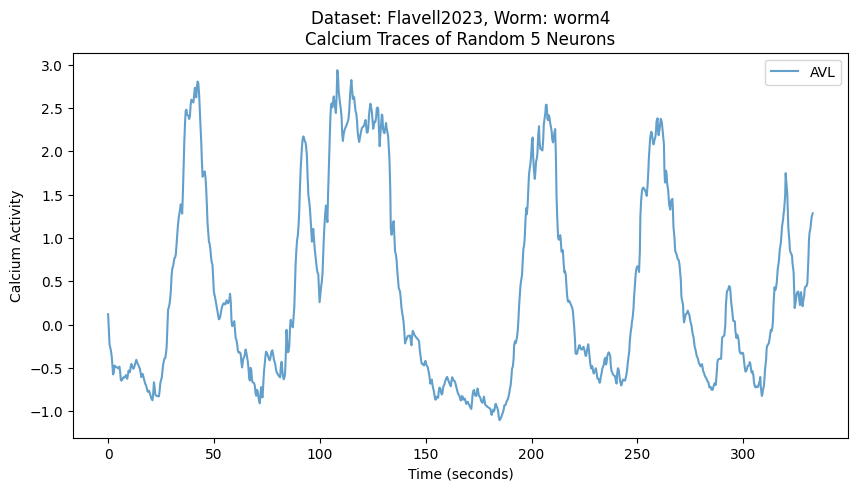

5
dict_values(['ADAL', 'ADEL', 'ADER', 'ADLL', 'AIAL', 'AIBL', 'AIBR', 'AIML', 'AINL', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASHL', 'ASIR', 'AUAL', 'AVAL', 'AVAR', 'AVDL', 'AVDR', 'AVER', 'AVHL', 'AVJL', 'AVJR', 'AVL', 'AWAL', 'AWAR', 'AWBL', 'AWCL', 'AWCR', 'BAGL', 'CEPDL', 'CEPVL', 'CEPVR', 'FLPL', 'I1L', 'I2L', 'I2R', 'I3', 'I6', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'IL2VL', 'IL2VR', 'M1', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'MCR', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RICL', 'RID', 'RIH', 'RIVL', 'RMDDL', 'RMDDR', 'RMDL', 'RMDVL', 'RMDVR', 'RMEL', 'RMER', 'RMEV', 'RMFL', 'RMFR', 'RMGL', 'SAADR', 'SMBDL', 'SMBDR', 'SMBVL', 'SMDVL', 'SMDVR', 'URBL', 'URBR', 'URYDL', 'URYVL', 'URYVR'])
{0: 'ADAL', 2: 'ADEL', 3: 'ADER', 6: 'ADLL', 10: 'AIAL', 12: 'AIBL', 13: 'AIBR', 14: 'AIML', 16: 'AINL', 18: 'AIYL', 19: 'AIYR', 20: 'AIZL', 21: 'AIZR', 39: 'ASEL', 40: 'ASER', 41: 'ASGL', 42: 'ASGR', 43: 'ASHL',

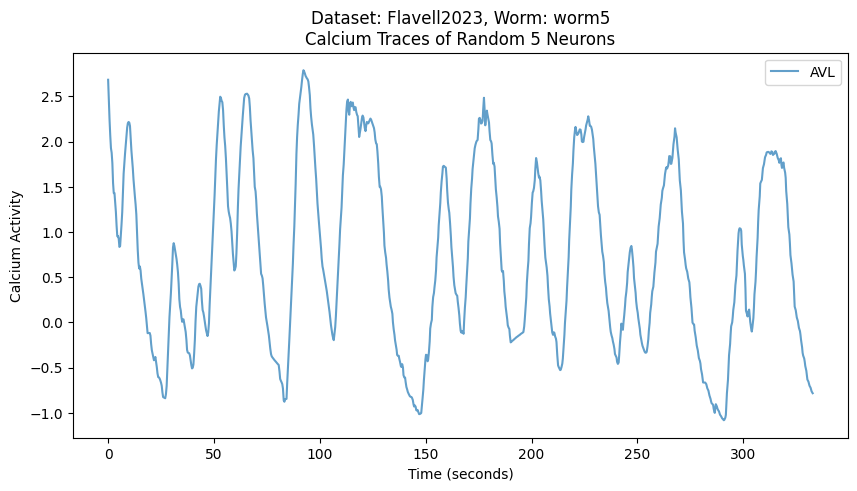

7
dict_values(['ADAL', 'ADEL', 'ADLL', 'AIBR', 'AINL', 'AIYL', 'AIYR', 'ALA', 'AQR', 'ASEL', 'ASGL', 'ASGR', 'ASHL', 'ASHR', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVDL', 'AVER', 'AVHL', 'AVL', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'BAGR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'FLPL', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'IL1DR', 'IL1L', 'IL1R', 'IL2DL', 'IL2VL', 'IL2VR', 'M3L', 'M3R', 'M4', 'MI', 'NSML', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAL', 'RICL', 'RID', 'RIH', 'RIML', 'RIMR', 'RIVL', 'RMDDL', 'RMDDR', 'RMDL', 'RMDR', 'RMDVL', 'RMDVR', 'RMEL', 'RMER', 'RMEV', 'RMGL', 'SAADL', 'SAADR', 'SMDDL', 'SMDDR', 'SMDVL', 'URADL', 'URAVL', 'URBL', 'URBR', 'URXL', 'URXR', 'URYDR', 'URYVL', 'URYVR', 'VB2'])
{0: 'ADAL', 2: 'ADEL', 6: 'ADLL', 13: 'AIBR', 16: 'AINL', 18: 'AIYL', 19: 'AIYR', 22: 'ALA', 27: 'AQR', 39: 'ASEL', 41: 'ASGL', 42: 'ASGR', 43: 'ASHL', 44: 'ASHR', 51: 'AUAL', 52: 'AUAR', 53: 'AVAL', 54: 'AVAR', 57: 'AVDL', 60: 'AVER', 64: 'AVHL', 70: 'AVL', 72: 'AWAL', 7

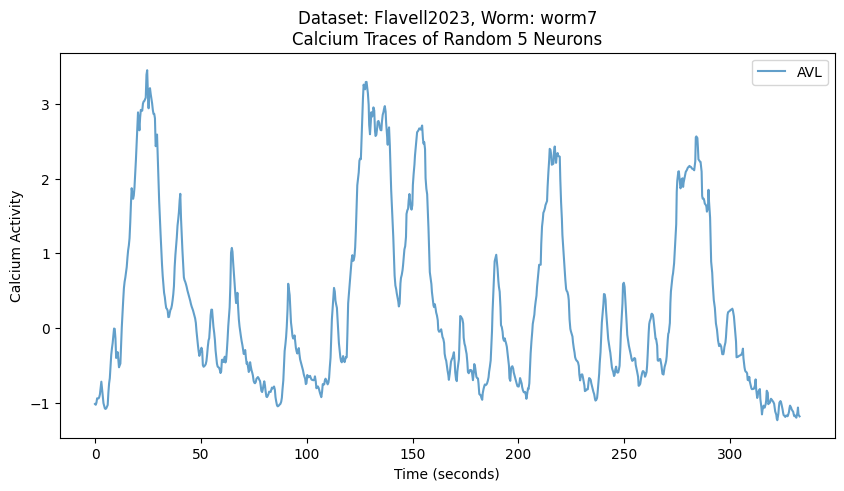

9
dict_values(['ADAL', 'ADEL', 'AIBL', 'AIML', 'AINL', 'AIZL', 'AVAL', 'AVBR', 'AVDL', 'AVDR', 'AVER', 'AVJL', 'AVJR', 'AVL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'I1L', 'I1R', 'I2L', 'I3', 'IL1DL', 'IL1DR', 'IL1VL', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'M3L', 'M3R', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'RIAL', 'RIBR', 'RICL', 'RIH', 'RIMR', 'RIVL', 'RIVR', 'RMDVR', 'RMEL', 'RMER', 'RMGL', 'SAADL', 'SAAVL', 'SMBVL', 'SMDDL', 'SMDVL', 'URBL', 'URXL', 'URXR', 'URYDR', 'URYVL'])
{0: 'ADAL', 2: 'ADEL', 12: 'AIBL', 14: 'AIML', 16: 'AINL', 20: 'AIZL', 53: 'AVAL', 56: 'AVBR', 57: 'AVDL', 58: 'AVDR', 60: 'AVER', 66: 'AVJL', 67: 'AVJR', 70: 'AVL', 73: 'AWAR', 74: 'AWBL', 75: 'AWBR', 76: 'AWCL', 82: 'CEPDL', 83: 'CEPDR', 84: 'CEPVL', 85: 'CEPVR', 115: 'I1L', 116: 'I1R', 117: 'I2L', 119: 'I3', 123: 'IL1DL', 124: 'IL1DR', 127: 'IL1VL', 129: 'IL2DL', 130: 'IL2DR', 131: 'IL2L', 132: 'IL2R', 140: 'M3L', 141: 'M3R', 146: 'MI', 147: 'NSML', 148: '

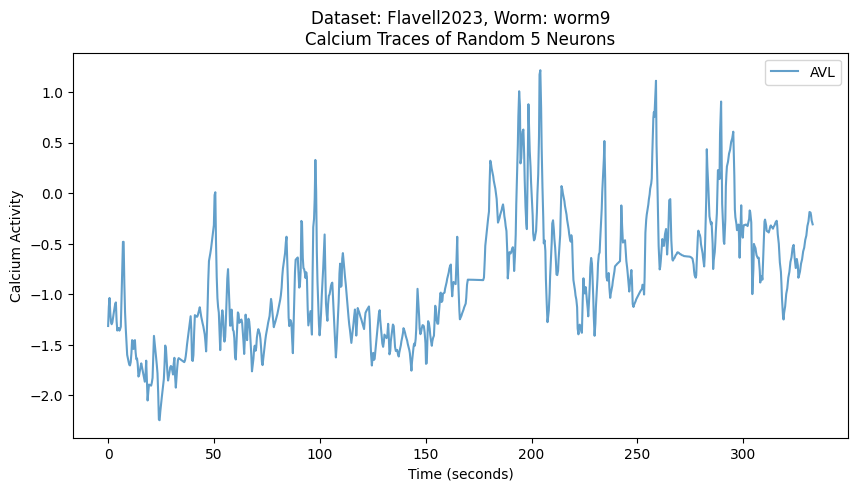

10
dict_values(['ADAR', 'ADER', 'AIBL', 'AIBR', 'AIMR', 'AIZL', 'ASEL', 'ASER', 'ASGL', 'ASHR', 'AUAR', 'AVAL', 'AVAR', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVHL', 'AVJL', 'AVJR', 'AVL', 'AWAR', 'BAGL', 'BAGR', 'CEPDR', 'FLPR', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I5', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL1VR', 'IL2VL', 'M3L', 'M4', 'MI', 'NSML', 'NSMR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RICL', 'RICR', 'RIH', 'RIR', 'RIS', 'RIVL', 'RIVR', 'RMDDL', 'RMDDR', 'RMDL', 'RMDVL', 'RMEL', 'RMER', 'RMEV', 'RMGR', 'SAADL', 'SAAVL', 'SMBDL', 'SMDVR', 'URBL', 'URBR', 'URXL', 'URYVL', 'URYVR'])
{1: 'ADAR', 3: 'ADER', 12: 'AIBL', 13: 'AIBR', 15: 'AIMR', 20: 'AIZL', 39: 'ASEL', 40: 'ASER', 41: 'ASGL', 44: 'ASHR', 52: 'AUAR', 53: 'AVAL', 54: 'AVAR', 56: 'AVBR', 57: 'AVDL', 58: 'AVDR', 59: 'AVEL', 60: 'AVER', 64: 'AVHL', 66: 'AVJL', 67: 'AVJR', 70: 'AVL', 73: 'AWAR', 78: 'BAGL', 79: 'BAGR', 83: 'CEPDR', 112: 'FLPR', 115: 'I1L', 116: 'I1R', 117: 'I2L', 118: 'I2R', 119: 'I3', 121: 'I5', 123

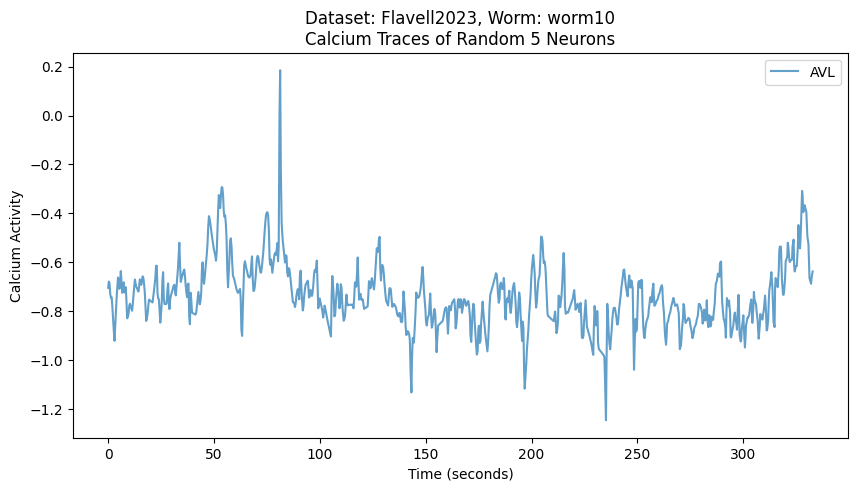

11
dict_values(['ADAL', 'ADEL', 'ADER', 'ADLL', 'ADLR', 'AIAL', 'AIBL', 'AIBR', 'AIML', 'AINL', 'AINR', 'AIZR', 'AQR', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASIL', 'ASIR', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVDL', 'AVDR', 'AVER', 'AVHL', 'AVJR', 'AVKL', 'AVL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'FLPL', 'FLPR', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL2DL', 'IL2DR', 'IL2VR', 'M1', 'M2L', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAL', 'RIBL', 'RIBR', 'RICL', 'RICR', 'RID', 'RIH', 'RIML', 'RIMR', 'RIVL', 'RIVR', 'RMDDL', 'RMDDR', 'RMDVL', 'RMDVR', 'RMEL', 'RMER', 'RMEV', 'SAAVL', 'SAAVR', 'SMBVR', 'SMDVL', 'SMDVR', 'URADR', 'URBL', 'URBR', 'URXL', 'URXR', 'URYDL', 'URYDR', 'URYVL', 'URYVR', 'VB2'])
{0: 'ADAL', 2: 'ADEL', 3: 'ADER', 6: 'ADLL', 7: 'ADLR', 10: 'AIAL', 12: 'AIBL', 13: 'AIBR', 14: 'AIML', 16: 'AINL', 17: 'AINR', 21: 'AIZR', 27: 'AQR', 39: 'ASEL', 

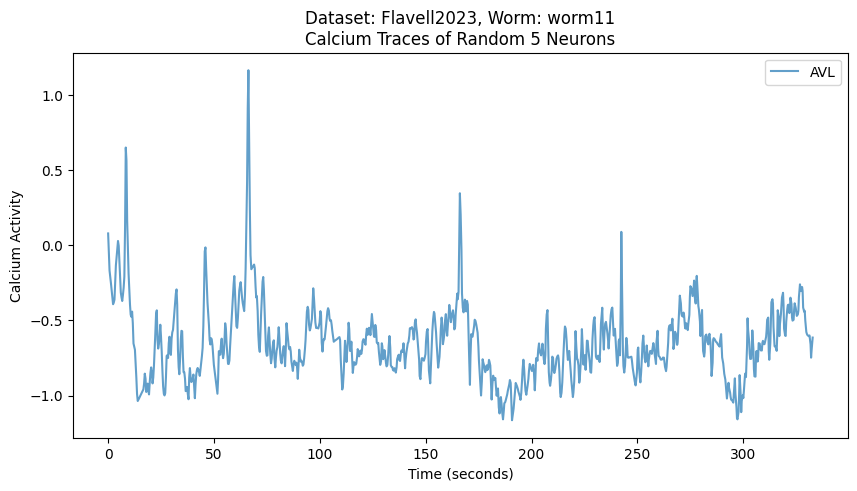

13
dict_values(['ADAL', 'ADEL', 'ADER', 'AIAL', 'AIBL', 'AIBR', 'AIML', 'AIZL', 'AIZR', 'ALA', 'ASGL', 'ASKL', 'ASKR', 'AUAL', 'AVAL', 'AVAR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVHL', 'AVJL', 'AVJR', 'AVL', 'AWAL', 'AWBL', 'AWCL', 'CEPDL', 'CEPDR', 'CEPVL', 'FLPL', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I6', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL1VR', 'IL2DR', 'IL2VR', 'M1', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'MCR', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAL', 'RIAR', 'RIBL', 'RICL', 'RICR', 'RID', 'RIH', 'RIMR', 'RIR', 'RIVL', 'RIVR', 'RMDDL', 'RMDDR', 'RMDL', 'RMDVL', 'RMED', 'RMEL', 'SAADL', 'SIADL', 'SMDDL', 'SMDVL', 'SMDVR', 'URADL', 'URXL', 'URXR', 'URYDL', 'URYDR', 'URYVL'])
{0: 'ADAL', 2: 'ADEL', 3: 'ADER', 10: 'AIAL', 12: 'AIBL', 13: 'AIBR', 14: 'AIML', 20: 'AIZL', 21: 'AIZR', 22: 'ALA', 41: 'ASGL', 49: 'ASKL', 50: 'ASKR', 51: 'AUAL', 53: 'AVAL', 54: 'AVAR', 57: 'AVDL', 58: 'AVDR', 59: 'AVEL', 60: 'AVER', 64: 'AVHL', 66: 'AVJL', 67: 

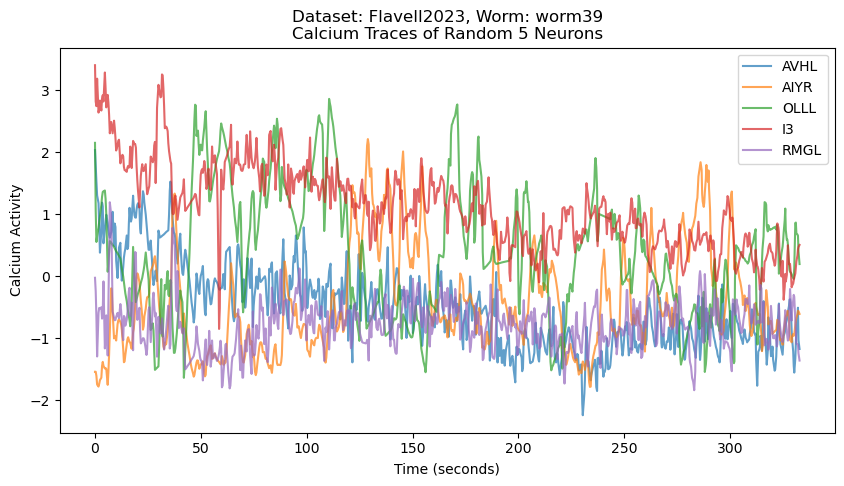

16
dict_values(['ADAL', 'ADEL', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL', 'AIYL', 'AIZL', 'AIZR', 'ASEL', 'ASGL', 'ASGR', 'ASHL', 'ASKL', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVHL', 'AVJL', 'AVJR', 'AVKL', 'AVL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'BAGL', 'BAGR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'FLPL', 'FLPR', 'I1R', 'I2L', 'I2R', 'I3', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VR', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'IL2VL', 'IL2VR', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'MCR', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAL', 'RIAR', 'RIBL', 'RICL', 'RICR', 'RID', 'RIH', 'RIML', 'RIPL', 'RIVL', 'RIVR', 'RMDDL', 'RMDDR', 'RMDL', 'RMDR', 'RMED', 'RMEL', 'RMER', 'RMEV', 'RMFL', 'RMGL', 'SAADL', 'SAADR', 'SAAVL', 'SAAVR', 'SIADL', 'SIAVL', 'SMBDL', 'SMBDR', 'SMBVR', 'SMDDL', 'SMDDR', 'SMDVL', 'SMDVR', 'URADL', 'URADR', 'URBL', 'URBR', 'URXL', 'URXR', 'URYDL', 'URYDR', 'URYVL', 'URYVR', 'VB2'])
{0: 'ADAL', 2: 'ADEL', 12: 'AIBL', 13: 'AIBR',

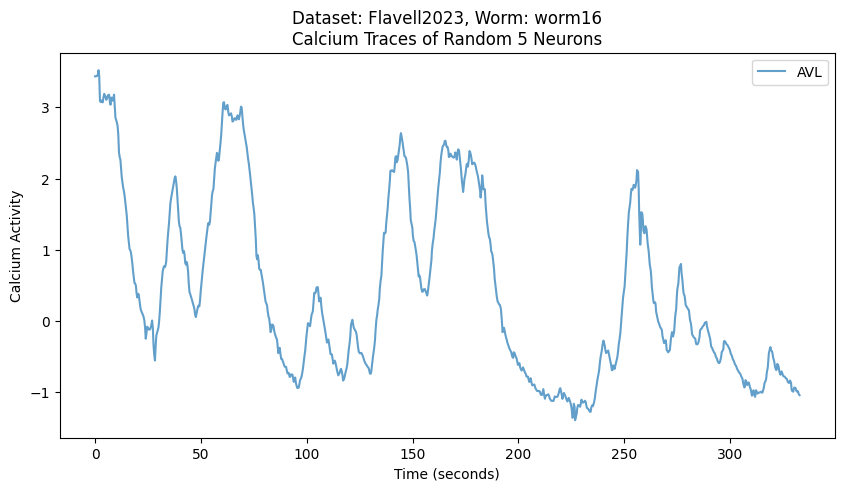

17
dict_values(['ADEL', 'ADLL', 'AIBL', 'AIBR', 'AIML', 'AINR', 'AIYL', 'AIZR', 'ASGL', 'ASGR', 'ASHL', 'AUAL', 'AVAL', 'AVAR', 'AVDL', 'AVEL', 'AVER', 'AVJL', 'AVKL', 'AVL', 'AWAL', 'AWBL', 'AWCL', 'AWCR', 'BAGL', 'CEPDL', 'CEPDR', 'CEPVL', 'I1L', 'I1R', 'I2L', 'I3', 'IL1DL', 'IL1DR', 'IL1L', 'IL1VL', 'IL1VR', 'IL2DL', 'IL2L', 'IL2VL', 'IL2VR', 'M3L', 'M3R', 'M4', 'MCL', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAL', 'RIBL', 'RICL', 'RID', 'RIH', 'RIR', 'RIVL', 'RMDDL', 'RMDL', 'RMDR', 'RMDVL', 'RMDVR', 'RMEL', 'RMER', 'RMFL', 'SAADL', 'SAADR', 'SAAVL', 'URAVL', 'URXL', 'URXR', 'URYDL', 'URYDR', 'URYVL'])
{2: 'ADEL', 6: 'ADLL', 12: 'AIBL', 13: 'AIBR', 14: 'AIML', 17: 'AINR', 18: 'AIYL', 21: 'AIZR', 41: 'ASGL', 42: 'ASGR', 43: 'ASHL', 51: 'AUAL', 53: 'AVAL', 54: 'AVAR', 57: 'AVDL', 59: 'AVEL', 60: 'AVER', 66: 'AVJL', 68: 'AVKL', 70: 'AVL', 72: 'AWAL', 74: 'AWBL', 76: 'AWCL', 77: 'AWCR', 78: 'BAGL', 82: 'CEPDL', 83: 'CEPDR', 84: 'CEPVL', 115: 'I1L', 11

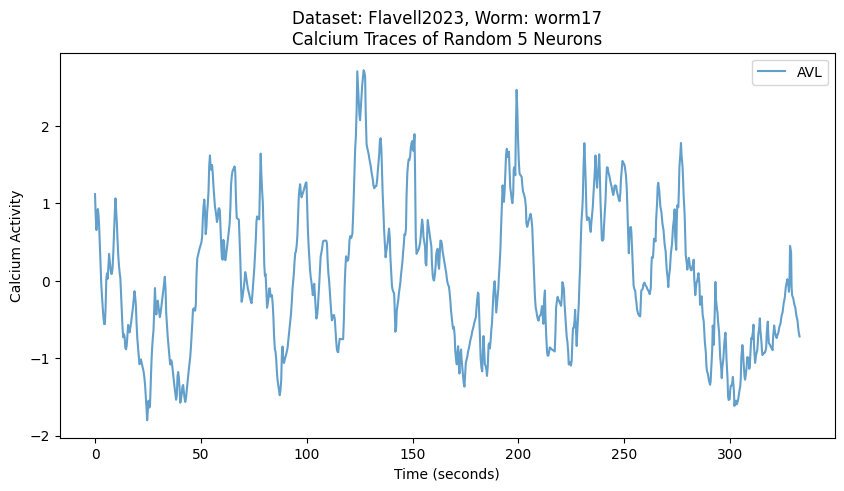

18
dict_values(['ADAL', 'ADEL', 'ADLL', 'AIAL', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL', 'AIZL', 'AIZR', 'ASEL', 'ASGL', 'ASGR', 'ASHL', 'ASIL', 'AUAL', 'AVAL', 'AVAR', 'AVDL', 'AVER', 'AVJL', 'AVKL', 'AVKR', 'AVL', 'AWAR', 'AWBL', 'AWCL', 'AWCR', 'CEPDL', 'CEPDR', 'FLPL', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'IL1DL', 'IL1DR', 'IL1R', 'IL1VL', 'IL1VR', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'IL2VL', 'IL2VR', 'M3L', 'M3R', 'MCL', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'RIAL', 'RIAR', 'RIBL', 'RICL', 'RIML', 'RIMR', 'RIVL', 'RIVR', 'RMDDL', 'RMDL', 'RMER', 'RMEV', 'RMGL', 'SAADL', 'SAAVR', 'SIADL', 'SIADR', 'SIAVR', 'SIBVL', 'SMBVL', 'SMDVL', 'SMDVR', 'URAVL', 'URBL', 'URXL', 'URXR', 'URYDL', 'URYDR', 'URYVL', 'URYVR', 'VB2'])
{0: 'ADAL', 2: 'ADEL', 6: 'ADLL', 10: 'AIAL', 12: 'AIBL', 13: 'AIBR', 14: 'AIML', 15: 'AIMR', 16: 'AINL', 20: 'AIZL', 21: 'AIZR', 39: 'ASEL', 41: 'ASGL', 42: 'ASGR', 43: 'ASHL', 45: 'ASIL', 51: 'AUAL', 53: 'AVAL', 54: 'AVAR', 57: 'AVDL', 60: 'AVER', 66: 

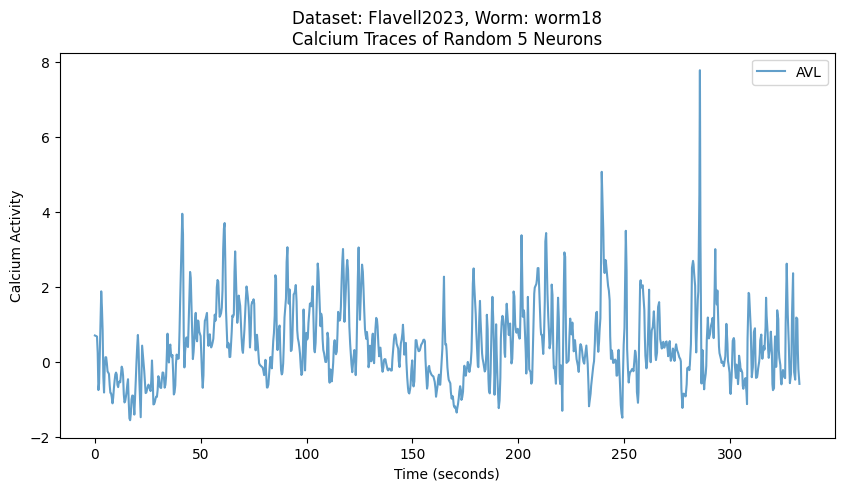

20
dict_values(['ADAL', 'ADEL', 'ADER', 'ADLR', 'AIAL', 'AIAR', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL', 'AINR', 'AIYL', 'AIZL', 'AIZR', 'AQR', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVJL', 'AVJR', 'AVKL', 'AVL', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'FLPL', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'IL2VL', 'IL2VR', 'M3L', 'M3R', 'M5', 'MCL', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIBL', 'RIBR', 'RICL', 'RICR', 'RID', 'RIH', 'RIML', 'RIR', 'RIVL', 'RIVR', 'RMDDL', 'RMDDR', 'RMDL', 'RMDVL', 'RMDVR', 'RMEL', 'RMER', 'RMGL', 'SAADR', 'SAAVR', 'SIADL', 'SMBDL', 'SMBDR', 'SMDVL', 'SMDVR', 'URBL', 'URXL', 'URXR', 'URYDL', 'URYVL', 'URYVR', 'VB2'])
{0: 'ADAL', 2: 'ADEL', 3: 'ADER', 7: 'ADLR', 10: 'AIAL', 11: 'AIAR', 12: 'AIBL', 13: 'AIBR', 14: 'AIML', 15: 'AIMR', 16: 'AINL', 17: 'AINR'

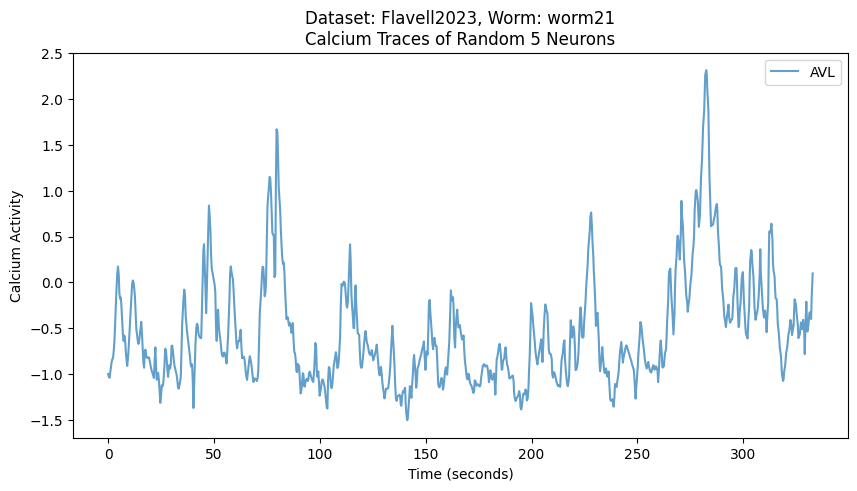

22
dict_values(['AIBL', 'AIBR', 'AIZL', 'ASEL', 'ASHL', 'AUAL', 'AVAR', 'AVDL', 'AVEL', 'AVER', 'AVHL', 'AVJL', 'AVL', 'AWBL', 'AWCL', 'CEPDL', 'CEPDR', 'CEPVR', 'FLPL', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL2DL', 'IL2L', 'IL2R', 'IL2VL', 'IL2VR', 'M1', 'M3L', 'M3R', 'M4', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAL', 'RIAR', 'RID', 'RIVL', 'RMDDL', 'RMDDR', 'RMDL', 'RMDR', 'RMDVL', 'RMDVR', 'RMED', 'RMEL', 'RMER', 'RMEV', 'RMFL', 'SAADR', 'SAAVL', 'SIADL', 'SMBDL', 'SMBDR', 'SMBVL', 'SMDDL', 'SMDDR', 'SMDVL', 'SMDVR', 'URADL', 'URADR', 'URBL', 'URBR', 'URXL', 'URXR', 'URYDL', 'URYDR'])
{12: 'AIBL', 13: 'AIBR', 20: 'AIZL', 39: 'ASEL', 43: 'ASHL', 51: 'AUAL', 54: 'AVAR', 57: 'AVDL', 59: 'AVEL', 60: 'AVER', 64: 'AVHL', 66: 'AVJL', 70: 'AVL', 74: 'AWBL', 76: 'AWCL', 82: 'CEPDL', 83: 'CEPDR', 85: 'CEPVR', 111: 'FLPL', 115: 'I1L', 116: 'I1R', 117: 'I2L', 118: 'I2R', 119: 'I3', 123: 'IL1DL', 124: 'IL1DR', 125: 'IL1L', 126: 

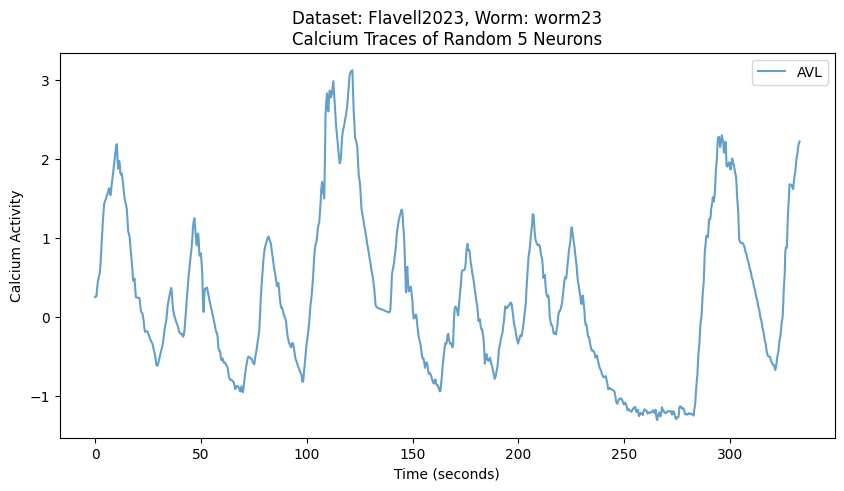

26
dict_values(['AIBL', 'AIBR', 'AIML', 'AINR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ASEL', 'ASGL', 'ASHL', 'ASIL', 'ASIR', 'AUAL', 'AUAR', 'AVBL', 'AVDL', 'AVDR', 'AVHL', 'AVJL', 'AVJR', 'AVL', 'AWBL', 'AWCL', 'BAGL', 'CEPDL', 'CEPDR', 'CEPVL', 'FLPL', 'FLPR', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I6', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL1VR', 'IL2DL', 'IL2DR', 'IL2L', 'IL2VL', 'IL2VR', 'M1', 'M3L', 'M4', 'M5', 'MCL', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIBL', 'RICL', 'RICR', 'RIH', 'RIML', 'RIS', 'RIVL', 'RIVR', 'RMDDR', 'RMDL', 'RMDVL', 'RMDVR', 'RMEL', 'RMER', 'RMEV', 'SAADL', 'SAADR', 'SIBDR', 'SMDDL', 'SMDDR', 'SMDVL', 'URAVL', 'URAVR', 'URBL', 'URBR', 'URXR', 'URYDL', 'URYDR', 'URYVL', 'URYVR', 'VB2'])
{12: 'AIBL', 13: 'AIBR', 14: 'AIML', 17: 'AINR', 18: 'AIYL', 19: 'AIYR', 20: 'AIZL', 21: 'AIZR', 39: 'ASEL', 41: 'ASGL', 43: 'ASHL', 45: 'ASIL', 46: 'ASIR', 51: 'AUAL', 52: 'AUAR', 55: 'AVBL', 57: 'AVDL', 58: 'AVDR', 64: 'AVHL', 66: 

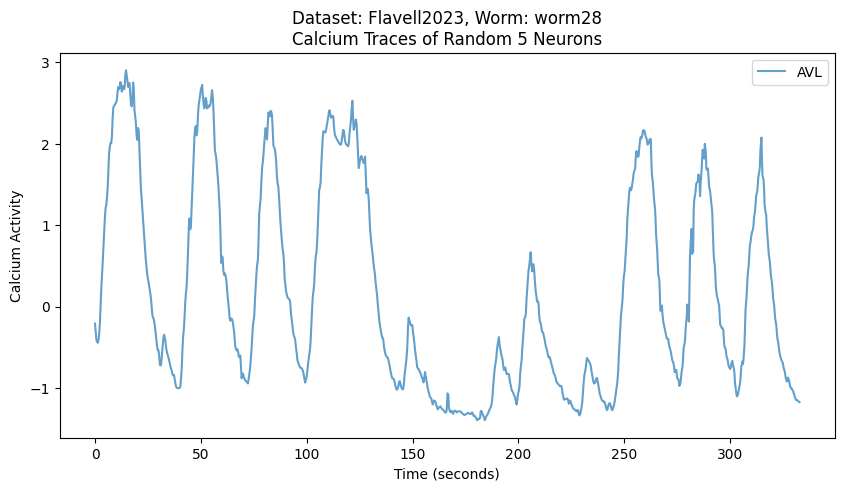

28
dict_values(['ADER', 'AIBR', 'AIMR', 'AINL', 'AINR', 'AIYL', 'AIZL', 'AIZR', 'AQR', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASIL', 'AUAL', 'AVDL', 'AVDR', 'AVEL', 'AVJL', 'AVJR', 'AVL', 'AWBL', 'AWCL', 'AWCR', 'BAGL', 'BAGR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'FLPL', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I6', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL1VR', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'M1', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'MCR', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVR', 'RICL', 'RID', 'RIH', 'RIVL', 'RIVR', 'RMDDL', 'RMDDR', 'RMDL', 'RMDR', 'RMDVL', 'RMDVR', 'RMEL', 'RMER', 'SAADL', 'SAADR', 'SMBDR', 'SMDDL', 'SMDDR', 'SMDVL', 'SMDVR', 'URAVL', 'URBL', 'URBR', 'URXL', 'URXR', 'URYVR'])
{3: 'ADER', 13: 'AIBR', 15: 'AIMR', 16: 'AINL', 17: 'AINR', 18: 'AIYL', 20: 'AIZL', 21: 'AIZR', 27: 'AQR', 39: 'ASEL', 40: 'ASER', 41: 'ASGL', 42: 'ASGR', 45: 'ASIL', 51: 'AUAL', 57: 'AVDL', 58: 'AVDR', 59: 'AVEL', 66: 'AVJL', 67: 'AVJR', 70: 'AVL', 74: 'AWBL', 76: 'AWCL', 77:

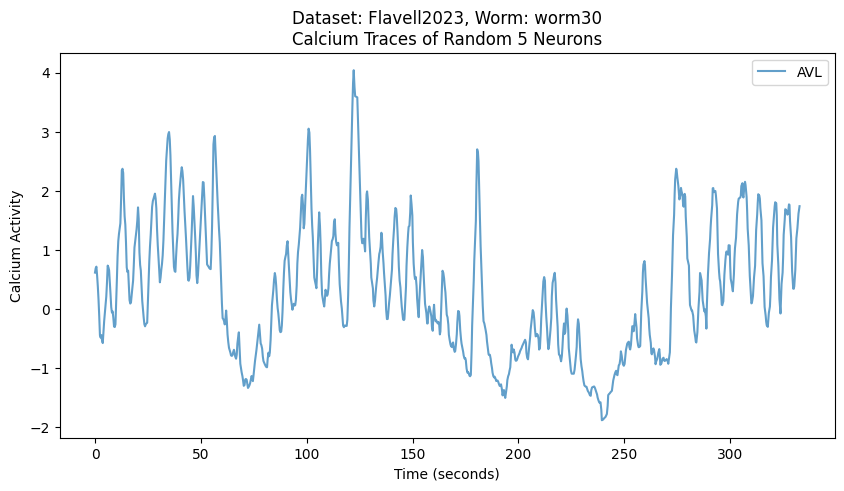

29
dict_values(['ADEL', 'AIBL', 'AIBR', 'AINL', 'AINR', 'AIYL', 'AIZL', 'AIZR', 'ASEL', 'ASGL', 'ASGR', 'ASIR', 'AUAL', 'AUAR', 'AVAL', 'AVDL', 'AVDR', 'AVER', 'AVJL', 'AVJR', 'AVL', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'BAGL', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'FLPL', 'FLPR', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I6', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL1VR', 'IL2DL', 'IL2DR', 'IL2L', 'IL2VL', 'IL2VR', 'M1', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'MCR', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIBL', 'RICL', 'RICR', 'RID', 'RIH', 'RIR', 'RIVL', 'RIVR', 'RMDDL', 'RMDVL', 'RMEL', 'RMER', 'RMFL', 'SAAVL', 'SIADR', 'SIBVR', 'SMBDL', 'SMDDR', 'SMDVL', 'URBL', 'URBR', 'URXL', 'URXR', 'URYDL', 'URYVL', 'URYVR'])
{2: 'ADEL', 12: 'AIBL', 13: 'AIBR', 16: 'AINL', 17: 'AINR', 18: 'AIYL', 20: 'AIZL', 21: 'AIZR', 39: 'ASEL', 41: 'ASGL', 42: 'ASGR', 46: 'ASIR', 51: 'AUAL', 52: 'AUAR', 53: 'AVAL', 57: 'AVDL', 58: 'AVDR', 60: 'AVER', 66: 'AVJL', 67: 'AVJR', 70: 'AVL',

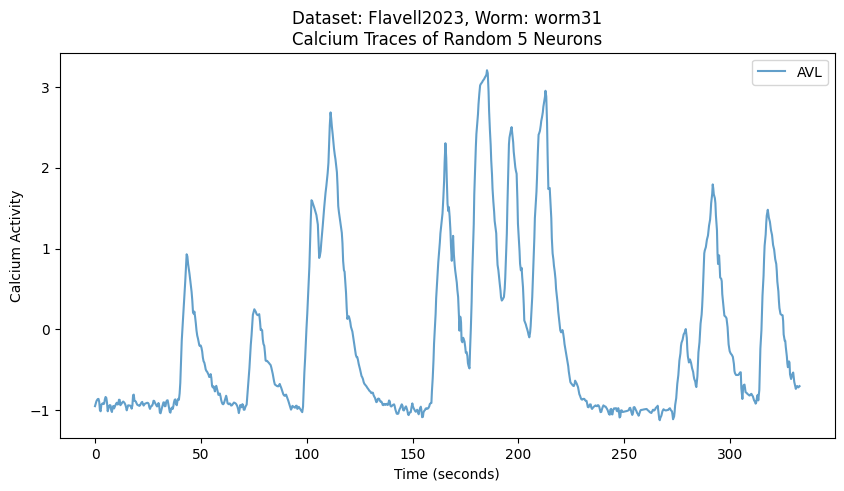

30
dict_values(['ADER', 'ADLL', 'ADLR', 'AIBR', 'AINR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ASEL', 'ASER', 'ASGL', 'ASIL', 'AUAL', 'AVAL', 'AVAR', 'AVBL', 'AVDR', 'AVEL', 'AVER', 'AVHL', 'AVJL', 'AVJR', 'AVL', 'AWAL', 'AWBL', 'AWBR', 'AWCL', 'CEPDL', 'CEPDR', 'CEPVL', 'FLPL', 'FLPR', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I6', 'IL1DL', 'IL1DR', 'IL1L', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'IL2VL', 'IL2VR', 'M1', 'M3L', 'M3R', 'M4', 'MCL', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAL', 'RIAR', 'RICL', 'RID', 'RIVL', 'RIVR', 'RMDDL', 'RMDL', 'RMDVL', 'RMDVR', 'RMER', 'RMEV', 'SAADL', 'SAAVL', 'SMBDL', 'SMDVL', 'URADL', 'URADR', 'URAVL', 'URBL', 'URBR', 'URXL', 'URXR', 'URYDL', 'URYDR', 'URYVL'])
{3: 'ADER', 6: 'ADLL', 7: 'ADLR', 13: 'AIBR', 17: 'AINR', 18: 'AIYL', 19: 'AIYR', 20: 'AIZL', 21: 'AIZR', 39: 'ASEL', 40: 'ASER', 41: 'ASGL', 45: 'ASIL', 51: 'AUAL', 53: 'AVAL', 54: 'AVAR', 55: 'AVBL', 58: 'AVDR', 59: 'AVEL', 60: 'AVER', 64: 'AVHL', 66: 'AVJL', 67: 

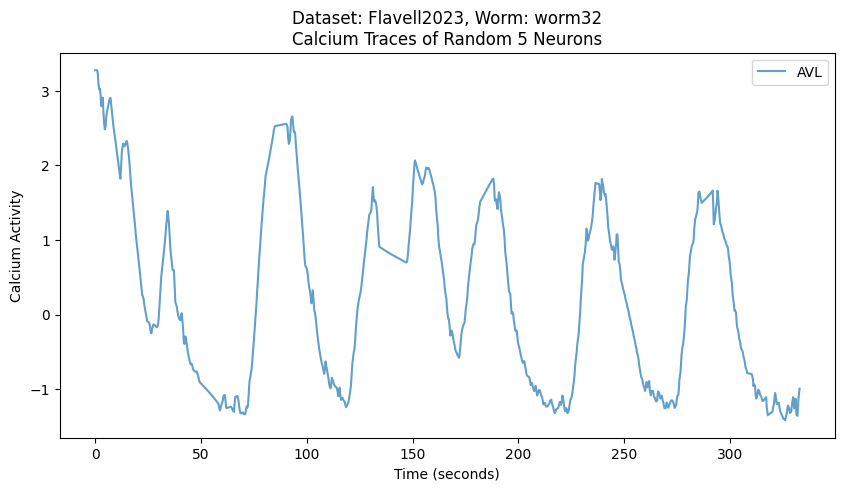

31
dict_values(['ADAL', 'ADEL', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL', 'AIYL', 'AIYR', 'AIZL', 'ASEL', 'ASGL', 'ASJL', 'AUAL', 'AVAL', 'AVAR', 'AVBL', 'AVDL', 'AVEL', 'AVER', 'AVHR', 'AVJL', 'AVJR', 'AVL', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'BAGL', 'CEPDL', 'CEPVL', 'CEPVR', 'FLPL', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL1VR', 'IL2DL', 'IL2DR', 'IL2L', 'IL2VL', 'IL2VR', 'M3L', 'M3R', 'MCL', 'MI', 'NSML', 'NSMR', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAL', 'RICL', 'RID', 'RIH', 'RIR', 'RIS', 'RIVL', 'RMDDL', 'RMDDR', 'RMDR', 'RMDVL', 'RMDVR', 'RMER', 'RMEV', 'RMGL', 'SAADL', 'SAADR', 'SAAVL', 'SAAVR', 'SIADL', 'SMBVR', 'SMDDL', 'SMDDR', 'SMDVL', 'URADL', 'URAVL', 'URAVR', 'URBL', 'URXL', 'URYDL', 'URYDR', 'URYVL', 'URYVR'])
{0: 'ADAL', 2: 'ADEL', 12: 'AIBL', 13: 'AIBR', 14: 'AIML', 15: 'AIMR', 16: 'AINL', 18: 'AIYL', 19: 'AIYR', 20: 'AIZL', 39: 'ASEL', 41: 'ASGL', 47: 'ASJL', 51: 'AUAL', 53: 'AVAL', 54: 'AVAR', 55: 'AVBL', 57: 'AVDL

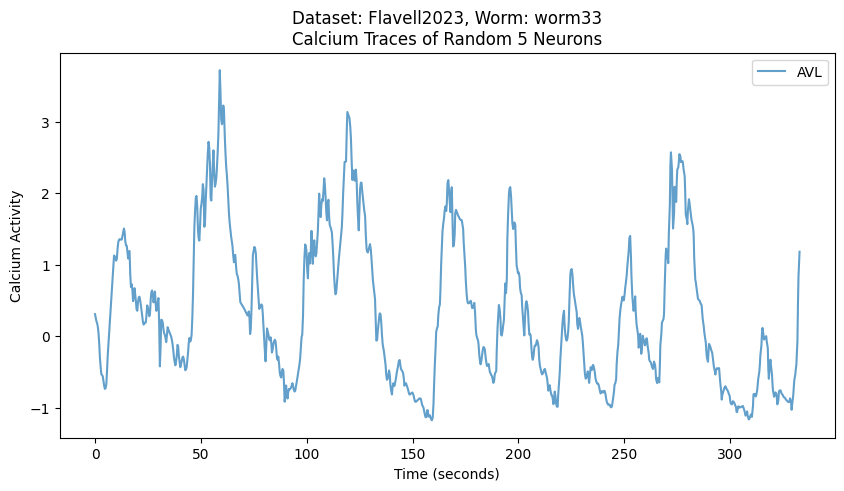

33
dict_values(['ADAL', 'ADEL', 'ADLL', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'AQR', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASHL', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVHL', 'AVJL', 'AVJR', 'AVKL', 'AVL', 'AWAL', 'AWAR', 'AWBL', 'AWCL', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'FLPL', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL2DL', 'IL2L', 'IL2R', 'IL2VL', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAL', 'RIAR', 'RIBL', 'RIBR', 'RICL', 'RICR', 'RID', 'RIS', 'RIVL', 'RIVR', 'RMDL', 'RMDVL', 'RMDVR', 'RMED', 'RMEL', 'RMER', 'RMEV', 'RMFL', 'SAAVL', 'SAAVR', 'SMDDL', 'SMDDR', 'SMDVL', 'SMDVR', 'URBL', 'URBR', 'URXL', 'URXR', 'URYDL', 'URYVL', 'URYVR', 'VB2'])
{0: 'ADAL', 2: 'ADEL', 6: 'ADLL', 12: 'AIBL', 13: 'AIBR', 14: 'AIML', 15: 'AIMR', 18: 'AIYL', 19: 'AIYR', 20: 'AIZL', 21: 'AIZR', 27: 'AQR', 39: 'ASEL', 40: 'ASER', 41: 'ASGL', 42: 'ASGR', 43: 

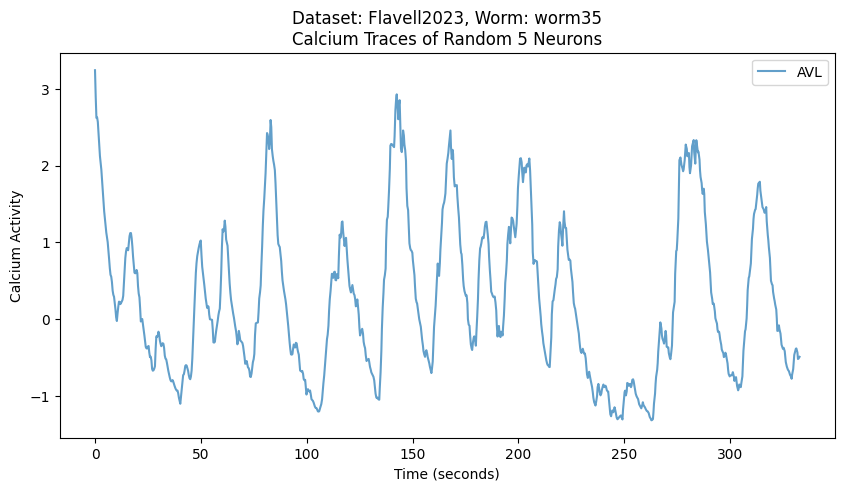

35
dict_values(['ADAL', 'ADEL', 'ADER', 'ADLR', 'AIBL', 'AIBR', 'AIMR', 'AINL', 'AIYL', 'AIZL', 'AIZR', 'AQR', 'ASEL', 'ASGL', 'ASGR', 'ASHL', 'AVAL', 'AVAR', 'AVBL', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVJL', 'AVJR', 'AVL', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'FLPL', 'FLPR', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'IL1DL', 'IL1DR', 'IL1L', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'IL2VL', 'IL2VR', 'M1', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVR', 'RIAL', 'RIBL', 'RICL', 'RICR', 'RID', 'RIML', 'RIMR', 'RIS', 'RIVL', 'RIVR', 'RMDDR', 'RMDL', 'RMDR', 'RMDVL', 'RMDVR', 'RMED', 'RMEL', 'RMER', 'RMFL', 'RMGL', 'SAADL', 'SAAVL', 'SMBDL', 'SMDDL', 'SMDDR', 'SMDVL', 'URADL', 'URADR', 'URBL', 'URBR', 'URXL', 'URXR', 'URYDL', 'URYDR', 'URYVL', 'URYVR', 'VB2'])
{0: 'ADAL', 2: 'ADEL', 3: 'ADER', 7: 'ADLR', 12: 'AIBL', 13: 'AIBR', 15: 'AIMR', 16: 'AINL', 18: 'AIYL', 20: 'AIZL', 21: 'AIZR', 27: 'AQR', 39: 'ASEL', 41: 'AS

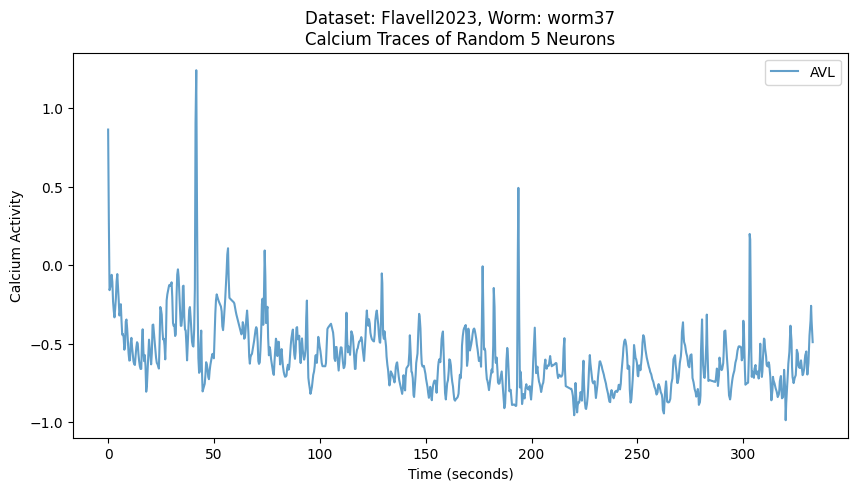

36
dict_values(['ADAL', 'ADEL', 'ADLL', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AIYL', 'AIYR', 'AIZR', 'ASEL', 'ASER', 'ASGR', 'ASHL', 'ASHR', 'ASIL', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVDR', 'AVEL', 'AVER', 'AVHL', 'AVJL', 'AVJR', 'AVL', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'BAGL', 'CEPDL', 'CEPDR', 'CEPVL', 'I1L', 'I2L', 'I2R', 'I3', 'I5', 'IL1DR', 'IL1L', 'IL1R', 'IL1VR', 'IL2DL', 'IL2DR', 'IL2R', 'IL2VL', 'IL2VR', 'M3L', 'M3R', 'M4', 'MCR', 'MI', 'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAL', 'RIAR', 'RIBL', 'RICL', 'RICR', 'RID', 'RIS', 'RIVL', 'RIVR', 'RMDDL', 'RMDDR', 'RMDL', 'RMDR', 'RMDVL', 'RMDVR', 'RMED', 'RMEL', 'RMER', 'RMEV', 'RMFL', 'RMGL', 'SAAVL', 'SAAVR', 'SIBVL', 'SMBVR', 'SMDVL', 'SMDVR', 'URAVL', 'URBL', 'URXL', 'URXR', 'URYDL', 'URYVL', 'URYVR'])
{0: 'ADAL', 2: 'ADEL', 6: 'ADLL', 12: 'AIBL', 13: 'AIBR', 14: 'AIML', 15: 'AIMR', 18: 'AIYL', 19: 'AIYR', 21: 'AIZR', 39: 'ASEL', 40: 'ASER', 42: 'ASGR', 43: 'ASHL', 44: 'ASHR', 45: 'ASIL', 51: 'AU

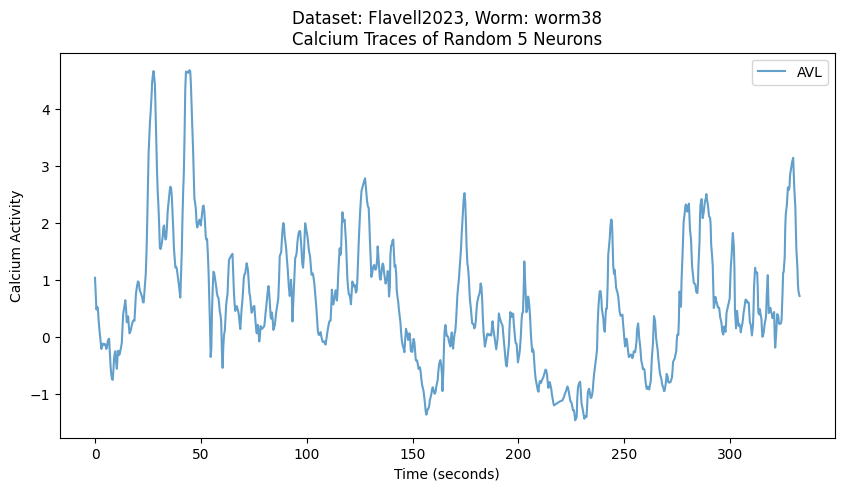

38
dict_values(['ADAL', 'ADEL', 'ADLL', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL', 'AIYL', 'AIZL', 'AIZR', 'AQR', 'ASEL', 'ASGL', 'ASGR', 'AUAL', 'AVAL', 'AVAR', 'AVBL', 'AVDL', 'AVEL', 'AVER', 'AVHL', 'AVJL', 'AVJR', 'AVKL', 'AVL', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'BAGL', 'CEPDL', 'CEPDR', 'CEPVR', 'FLPL', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I5', 'I6', 'IL1DL', 'IL1DR', 'IL1L', 'IL1VL', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'M1', 'M3L', 'M3R', 'M4', 'MCL', 'MCR', 'NSML', 'NSMR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'RIAR', 'RIBL', 'RICL', 'RID', 'RIH', 'RIS', 'RIVL', 'RIVR', 'RMDDL', 'RMDDR', 'RMDL', 'RMDR', 'RMER', 'RMGL', 'SAADL', 'SAADR', 'SAAVL', 'SIADR', 'SIBVL', 'SMBVL', 'SMDDL', 'SMDDR', 'SMDVL', 'SMDVR', 'URBL', 'URXL', 'URYDL', 'URYDR', 'URYVL', 'VB2'])
{0: 'ADAL', 2: 'ADEL', 6: 'ADLL', 12: 'AIBL', 13: 'AIBR', 14: 'AIML', 15: 'AIMR', 16: 'AINL', 18: 'AIYL', 20: 'AIZL', 21: 'AIZR', 27: 'AQR', 39: 'ASEL', 41: 'ASGL', 42: 'ASGR', 51: 'AUAL', 53: 'AVAL', 54: 'AVAR', 5

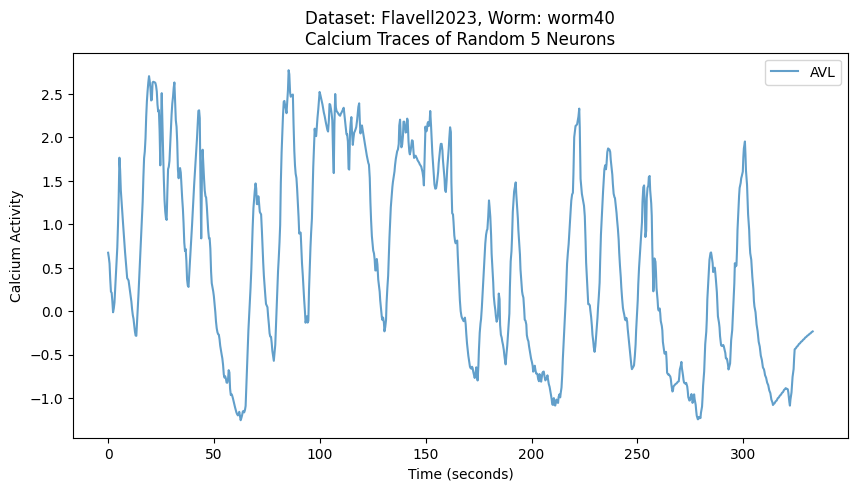

Avg num. neurons ID'd/recorded : 88/136
Range num. ID'd neurons : (64, 115)
Range len. calcium data : (2890, 2917)


In [9]:
# @title Atanas & Kim et al., Cell 2023, _Brain-Wide Representations of Behavior Spanning Multiple Timescales and States in C. Elegans_
# @markdown Source: wormwideweb.org

# load the dataset
dataset_name = "Flavell2023"
Flavell2023 = load_dataset(dataset_name)
print(len(Flavell2023), Flavell2023.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Flavell2023.keys()):
    single_worm_dataset = pick_worm(Flavell2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Flavell2023)
    named_avg += labeled_neurons / len(Flavell2023)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Flavell2023.keys()))
single_worm_dataset = pick_worm(Flavell2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# # ### DEBUG ###
# for i, worm in enumerate(list(Flavell2023.keys())):
#     single_worm_dataset = pick_worm(Flavell2023, worm)

#     if ("AVL" in list(single_worm_dataset["slot_to_labeled_neuron"].values())) or (
#         "DVB" in list(single_worm_dataset["slot_to_labeled_neuron"].values())
#     ):
#         print(i)
#         print(single_worm_dataset["slot_to_labeled_neuron"].values())
#         plot_worm_data(single_worm_dataset, "AVL", smooth=False)

#     total_neurons = single_worm_dataset["num_neurons"]
#     labeled_neurons = single_worm_dataset["num_labeled_neurons"]
#     max_timesteps = single_worm_dataset["max_timesteps"]
#     total_avg += total_neurons / len(Flavell2023)
#     named_avg += labeled_neurons / len(Flavell2023)
#     neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
#     neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
#     timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
#     timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
# print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
# print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
# print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
# worm = np.random.choice(list(Flavell2023.keys()))
# worm = list(Flavell2023.keys())[4]
# single_worm_dataset2 = pick_worm(Flavell2023, worm)

# print(single_worm_dataset["slot_to_labeled_neuron"].values())

# # plot the calcium activity
# plot_worm_data(single_worm_dataset, "DVB", smooth=False)
# # ### DEBUG ###

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Flavell2023)):  # no idea why worm0 does not exist for Flavell2023
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Flavell2023, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

110 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48', 'worm49', 'worm50', 'worm51', 'worm52', 'worm53', 'worm54', 'worm55', 'worm56', 'worm57', 'worm58', 'worm59', 'worm60', 'worm61', 'worm62', 'worm63', 'worm64', 'worm65', 'worm66', 'worm67', 'worm68', 'worm69', 'worm70', 'worm71', 'worm72', 'worm73', 'worm74', 'worm75', 'worm76', 'worm77', 'worm78', 'worm79', 'worm80', 'worm81', 'worm82', 'worm83', 'worm84', 'worm85', 'worm86', 'worm87', 'worm88', 'worm89', 'worm90', 'worm91', 'worm92', 'worm93', 'worm94', 'worm95', 'worm96', 'worm97', 'worm98', 'worm

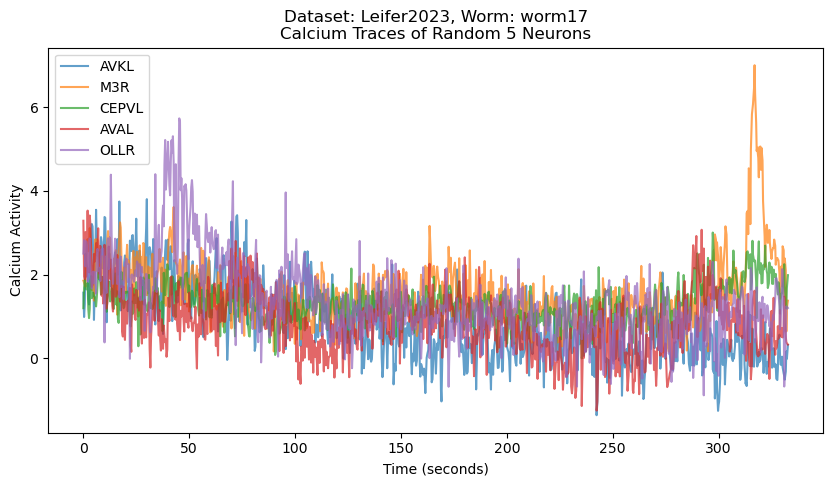

In [10]:
# @title Randi et al., Nature 2023. _Neural Signal Propagation Atlas of Caenorhabditis Elegans_
# @markdown Source: https://osf.io/e2syt/

# load the dataset
dataset_name = "Leifer2023"
Leifer2023 = load_dataset(dataset_name)
print(len(Leifer2023), Leifer2023.keys(), end="\n\n")


# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Flavell2023.keys()):
    single_worm_dataset = pick_worm(Flavell2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Flavell2023)
    named_avg += labeled_neurons / len(Flavell2023)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Flavell2023.keys()))
single_worm_dataset = pick_worm(Flavell2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # number of ID'd neurons versus number of neurons measured
# neurons_stats = dict(min=float("inf"), max=float("-inf"))
# timesteps_stats = dict(min=float("inf"), max=float("-inf"))
# total_avg, named_avg = 0, 0
# for i, worm in enumerate(list(Leifer2023.keys())):
#     single_worm_dataset = pick_worm(Leifer2023, worm)

#     if ("AVL" in list(single_worm_dataset["slot_to_labeled_neuron"].values())) or (
#         "DVB" in list(single_worm_dataset["slot_to_labeled_neuron"].values())
#     ):
#         print(i)

#     total_neurons = single_worm_dataset["num_neurons"]
#     labeled_neurons = single_worm_dataset["num_labeled_neurons"]
#     max_timesteps = single_worm_dataset["max_timesteps"]
#     total_avg += total_neurons / len(Leifer2023)
#     named_avg += labeled_neurons / len(Leifer2023)
#     neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
#     neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
#     timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
#     timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
# print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
# print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
# print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# # get data for one worm
# # worm = np.random.choice(list(Leifer2023.keys()))
# worm = []
# single_worm_dataset = pick_worm(Leifer2023, worm)

# # plot the calcium activity
# plot_worm_data(single_worm_dataset, smooth=False)
# ### DEBUG ###

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Leifer2023)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Leifer2023, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

577 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48', 'worm49', 'worm50', 'worm51', 'worm52', 'worm53', 'worm54', 'worm55', 'worm56', 'worm57', 'worm58', 'worm59', 'worm60', 'worm61', 'worm62', 'worm63', 'worm64', 'worm65', 'worm66', 'worm67', 'worm68', 'worm69', 'worm70', 'worm71', 'worm72', 'worm73', 'worm74', 'worm75', 'worm76', 'worm77', 'worm78', 'worm79', 'worm80', 'worm81', 'worm82', 'worm83', 'worm84', 'worm85', 'worm86', 'worm87', 'worm88', 'worm89', 'worm90', 'worm91', 'worm92', 'worm93', 'worm94', 'worm95', 'worm96', 'worm97', 'worm98', 'worm

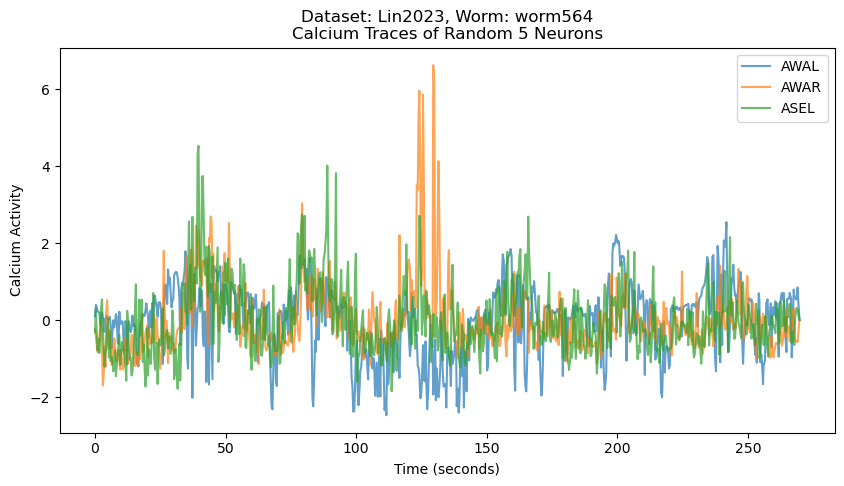

In [11]:
# @title Lin et al., Science Advances 2023, _Functional Imaging and Quantification of Multineuronal Olfactory Responses in C. Elegans_
# @markdown Source: https://www.dropbox.com/scl/fi/g6r1mg90n9o5gtm9he70x/raw_sensory_data_package.zip?rlkey=1n4lgipqghpr7s6bfw7sc9e11&dl=1

# load the dataset
dataset_name = "Lin2023"
Lin2023 = load_dataset(dataset_name)
print(len(Lin2023), Lin2023.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Lin2023.keys()):
    single_worm_dataset = pick_worm(Lin2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Lin2023)
    named_avg += labeled_neurons / len(Lin2023)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Lin2023.keys()))
single_worm_dataset = pick_worm(Lin2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Lin2023)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Lin2023, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

22 ['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21']

Avg num. neurons ID'd/recorded : 187/187
Range num. ID'd neurons : (185, 189)
Range len. calcium data : (5497, 5497)


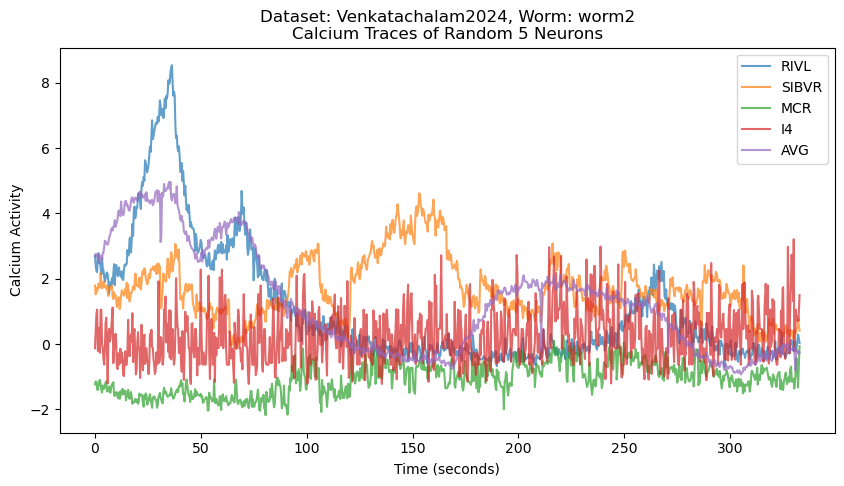

In [12]:
# @title Venkatachalam (2024). Email correspondence to Quilee Simeon from Vivek Venkatachalam "Re: Request for C. elegans neural data" on June 18, 2024
# @markdown Source: https://chemosensory-data.worm.world/

# load the dataset
dataset_name = "Nejatbakhsh2020"
Nejatbakhsh2020 = load_dataset(dataset_name)
print(len(Nejatbakhsh2020), list(Nejatbakhsh2020.keys()), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Nejatbakhsh2020.keys()):
    single_worm_dataset = pick_worm(Nejatbakhsh2020, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    labeled_neurons = single_worm_dataset["num_labeled_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Nejatbakhsh2020)
    named_avg += labeled_neurons / len(Nejatbakhsh2020)
    neurons_stats["min"] = min(neurons_stats["min"], labeled_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], labeled_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Nejatbakhsh2020.keys()))
single_worm_dataset = pick_worm(Nejatbakhsh2020, worm)

# plot the calcium activity for a few neurons
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Nejatbakhsh2020)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Nejatbakhsh2020, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["labeled_neurons_mask"],
#         single_worm_dataset["unlabeled_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###